## Введение

Сегодня познакомимся с инструментами работы с данными. 

Библиотеки **numpy, pandas, matplotlib**. 

In [1]:
import numpy as np # для работы с числами, векторами и матрицами
import pandas as pd # для работы с датасетом (это умное слово для "набора данных" или "таблицы")
import matplotlib.pyplot as plt # для построения графиков

## Данные

Скачаем данные в переменную *dataset*. Метод *pd.read_csv()* считывает csv-файлы. <span style='color:darkred'>titanic.csv</span> - название файла. 

In [2]:
dataset = pd.read_csv('titanic.csv')

Преобразуем скачанныее данные в датафрейм с помощью метода *pd.DataFrame()*. Датафрейм - это некоторая форма, в которой мы будем держать наши данные, чтобы удобнее на них смотреть. Таблица, если угодно. 

In [3]:
data = pd.DataFrame(dataset)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# размерности нашего датафрейма

data.shape

(891, 12)

**Разберемся с содержимым датасета**

Первым делом следует взглянуть на данные и понять, что <span style='color:green'>признаки</span> (это те данные, на которых мы будем строить свое предсказание) из себя представляют и какое распределение имеют. В данном случае, признаками являются столбцы(возраст, пол, ...)

In [5]:
data.columns # достаем названия столбцов

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.dtypes # достаем типы данных в каждом столбце

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Поподробнее о типах данных в датасете. 

int64 - целое число (<span style='color:green'>int</span>)

float64 - дробное число (<span style='color:green'>float</span>)

object - строка (<span style='color:green'>str</span>)

datetime64 - дата

---
#### <span style='color:darkblue'>Будем выделять несколько основных типов признаков:</span>

- <span style='color:darkblue'>бинарные</span> (**2 возможных значения**: 1/0, True/False, 1/-1, ...)
- <span style='color:darkblue'>категориальные</span> (нельзя сравнить между собой) (**конечный набор возможных значений**: Red/Green/Blue, True/False/NotStated, Moscow/St.Petersburgh/Kazan/Samara)
- <span style='color:darkblue'>вещественные</span> (**вещественные числа**: возраст, год, площадь квартиры, ...)
---

**<span style='color:red'>??</span>** Какие из признаков в этом датасете можно отнести к каждому типу?

### Поиграем с данными, чтобы лучше понять их структуру и подготовить их

Введем понятие массива - np.array(). Массив - это некоторая последовательность элементов. Подобные массивы могут быть как одномерными(вектора - элементы идут подряд), так и многомерными(матрицы - многомерные вектора). На примерах станет понятнее. 

In [7]:
arr = np.array([1, 2, 3, 167]) # одномерный массив - вектор
matr = np.array([[1, 2, 3],
                [4, 5, 6]]) # двумерный массив - матрица 2x3

print(arr)
print(matr)

[  1   2   3 167]
[[1 2 3]
 [4 5 6]]


Чтобы не погружаться глубоко, имеет смысл предпочитать использование numpy-массивов вместо python-списков, поскольку, в большинстве случаев, операции над ними осуществляются быстрее и с меньшим использованием вычислительной мощности. 

In [8]:
# ключевые функции при работе с массивами

print(np.sum(arr)) # сумма элементов
print(np.sum(matr, axis=0)) # сумма элементов вдоль определенной оси
print(arr / 100) # применение арифметических операций ко всем элементам параллельно
print(np.dot(arr, np.array([1, -1, -2, 1]))) # скалярное произведение векторов

173
[5 7 9]
[0.01 0.02 0.03 1.67]
160


**Посмотрим на статистику смертей**

Выживание пассажира - наша целевая переменная(то, что мы пытаемся предсказать). Она хранится в столбце 'Survived'. 

Это <span style='color:darkblue'>бинарный</span> тип данных(имеет тоолько ДВА возможных значения). Если значение столбца равно 1 - значит, пассажир выжил, равно 0 - значит, погиб.

In [9]:
deaths = np.sum(data['Survived']==0)

print('Deaths on Titanic: ' + str(deaths)) 
print('Share of deaths: ' + str(deaths/len(data)))

Deaths on Titanic: 549
Share of deaths: 0.6161616161616161


**Посмотрим на возраст пассажиров**

Используем гистограмму (график в виде столбиков) с помощью метода *plt.hist()*. 

<span style='color:red'>!</span> Чтобы посмотреть, что еще можно указать в качестве аргумента к методу, кликни внутрь скобок в ячейке и нажми Shift+Tab. 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


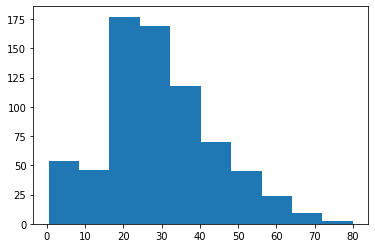

In [10]:
plt.hist(data['Age'])
plt.show()

In [11]:
# взглянем на возраст самого молодого и взрослого пассажиров

min(data['Age']), max(data['Age'])

(0.42, 80.0)

In [12]:
data.iloc()[630] # с помощью .iloc() мы можем обращаться к конкретной строке датасета. 

# Так устроены датасеты в pandas. Не спрашивай зачем :)

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

**Лирическое отступлению на тему метода *.iloc()*.**

В объекте типа DataFrame мы можемм доставать любой столбец, обращаясь к его имени. Например, *data*[<span style='color:darkred'>'Age'</span>]. Подобная запись создает так называемый Series object, но проще удумать об этом, как о списке с элементами этого столбца с индексами строк, на которых находится каждый из них. Теперь мы можем по этому индексу вытащить значение из этого столбца. Например, *data*[<span style='color:darkred'>'Age'</span>][30]. 

Метод *.iloc()*, в свою очередь, позволяет создать форму, в которой можно сразу обращаться к конкретной строке и столбцу. 

Например, *data.iloc()[0][3]* достанет значение ячейки "по адресу" 0-вая строка, 3-ий столбец. 

In [13]:
data.iloc()[0][3]

'Braund, Mr. Owen Harris'

In [14]:
# Попробууй построить распределение стоимости билета и сделай вывод 

### YOUR CODE GOES HERE ###

Подсчитаем количество NaN значений (пустые ячейки) по столбцам. Они мешают нам работать с данными. 

In [15]:
np.sum(data.isnull(), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*.isnull()* определяет, в каких ячейках хранятся NaN-значения. *.np.sum()* суммирует их(в этом случае, True - ячейка NaN - засчитывается как 1, а False - ячейка не NaN - как 0) по столбцам(за это отвечает *axis=0*, указывая, вдоль какой оси суммировать).

Строки с подобными ячейками можно *выбросить* или *заменить значения* в таких ячейках. Наиболее используемы замены на среднее и медиана(для вещественных признаков) или наиболее частое значение признака(для категориальных).

Заменим пустые значения в возрасте(<span style='color:darkred'>'Age'</span>) на среднее

In [16]:
# заменим на среднее

age_mean = np.mean(data['Age'])
data['Age'] = data['Age'].fillna(age_mean)

Метод *np.mean()* находит среднее значение переданного ему аргумента. 
Можно использовать и метод *np.median()*, чтобы найти медиану, но для этого нужно сначала избавиться от NaN значений, поэтому для нашей цели проще использовать среднее. 

Метод *.fillna()* заменяет NaN значения в том, к чему он применен(в нашем случае, в data[<span style='color:darkred'>'Age'</span>]), на то значение, которое указано в качестве аргумента(в нашем случае, *age_mean*). 

In [17]:
# data # проверим, как теперь выглядит признак 'Age' в датасете

Удалим столбец <span style='color:darkred'>'Cabin'</span> - там из 891 строки 687 пустые. Замена может не отражать реальность

In [18]:
# удалим столбец
data = data.drop(columns='Cabin')

# метод .drop() может выбросить как строки, так и столбцы. Для того, чтобы специализировать, что именно хотим выбросить, 
# указываем названия столбцов в columns

В <span style='color:darkred'>'Embarked'</span> всего 2 пропуска в 891 строке. Качество предсказания не пострадает значитаельно, если заполнить эти поля рандомно (или найти наиболее популярное значения(это категориальный признак))

In [19]:
# заменим рандомно (можно заменить на наиболее частый)

embarked_values = set(data['Embarked'])
embarked_values

{'C', 'Q', 'S', nan}

In [20]:
data['Embarked'] = data['Embarked'].fillna('C')

Проверим, что мы избавились от NaN значений

In [21]:
np.sum(data.isnull(), axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
if set(np.sum(data.isnull(), axis=0)) == {0}:
    print('РЕСПЕКТ! Мы избавились от пустых ячеек в датасете')

РЕСПЕКТ! Мы избавились от пустых ячеек в датасете


Посмотрим на распределение по полу среди пассажиров

(array([577.,   0., 314.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

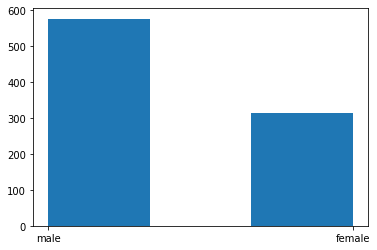

In [23]:
plt.hist(data['Sex'], bins=3)

Посмотрим на распределение по полу среди выживших пассажиров

In [24]:
survived_sex = np.where(data['Survived']==1, data['Sex'], '0')
survived_sex = [x for x in survived_sex if x != '0']
survived_sex

['female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',


(array([233.,   0., 109.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

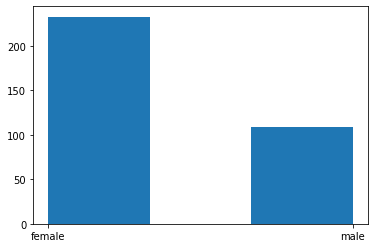

In [25]:
plt.hist(survived_sex, bins=3)

Действительно, первым делом спсали женщин и детей. На борту женщин почти вдвое меньше, но спаслось их почти вдвое больше

Посмотрим на точные доли спасшихся мужчин и женщин

In [26]:
males_survived = np.sum(np.array(survived_sex)=='male')/np.sum(data['Sex']=='male')
females_survived = np.sum(np.array(survived_sex)=='female')/np.sum(data['Sex']=='female')

print('Share of MALE passengers survived: ' + str(males_survived))
print('Share of FEMALE passengers survived: ' + str(females_survived))

Share of MALE passengers survived: 0.18890814558058924
Share of FEMALE passengers survived: 0.7420382165605095


## Мы проделали неплохую работу по анализу данных, но самое главное еще впереди. 

### Ты еще помнишь, для чего мы это делаем?

### Подготовка признаков

Давай взглянем на обработанный датасет еще раз

In [27]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Наша задача построить модель, которая сможет по значениям ПРИЗНАКОВ предсказывать выживет пассажир или нет (ЦЕЛЕВАЯ ПЕРЕМЕННАЯ 'Survived')

Как считаешь, какие признаки для этого бесполезны? Почему? 

In [28]:
# Выкинь их из датасета

### YOUR CODE GOES HERE ###

#### <span style='color:darkblue'>One-hot-encoding</span> и <span style='color:darkblue'>Label-encoding</span>. Или как сделать категориальные признаки обрабатываемыми

Забегая вперед, наша модель будет умножать признаки на какие-то веса для того, чтобы они имели разную важность для предсказания. 

Допустим, очевидно, что место посадки на борт, скорее всего, имеет меньшее значение для выживания, чем пол, поскольку нам известно, что детей и женщин спасали в первую очередь. 

Поэтому необходимо преобразовать строчные(<span style='color:green'>str</span>) признаки в численные(<span style='color:green'>int</span> или <span style='color:green'>float</span>). 

In [29]:
from sklearn.preprocessing import OneHotEncoder # one-hot-encoding 
from sklearn.preprocessing import LabelEncoder # label-encoding

Что это?

Для one-hot-encoding воспользуемся методом OneHotEncoder().

In [30]:
enc = OneHotEncoder()
sex_ohe = pd.DataFrame(enc.fit_transform(data[['Sex']]).toarray())

In [31]:
sex_ohe

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [32]:
data['female'] = sex_ohe[0]
data['male'] = sex_ohe[1]
data = data.drop(columns=['Sex'])

In [33]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,0.0,1.0


Label-encoding. Что это? В чем отличие от One-hot-encoding? 

Немного иное преобразование категориального признака.

In [34]:
# Напишем label-encoding руками

# gender = {'male': 1, 'female': 0}
# data['Sex'] = [gender[g] for g in data['Sex']]

emb = {'C': 0, 'Q': 1, 'S':2}
data['Embarked'] = [emb[x] for x in data['Embarked']]

Посмотрм на то, как мы преобразовали данные и сравним с тем, как они выглядили изначально

In [35]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,2,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,2,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,2,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,2,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,2,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,2,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,0.0,1.0


### Поздравляю! 

#### Ты стал(а) еще чуточку круче! 